In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt ##data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


**Artificial Neural Networks(ANN)**

Data Preprocessing

In [2]:
#Loading the dataset
df =pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
#checking the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
print(X)
print(y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [5]:
## Creating dummy variables

geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [6]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [7]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [8]:
##Concatenate dataframes
X = pd.concat([X, geography, gender], axis = 1)

In [9]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [10]:
##Drop unecessary columns
X = X.drop(['Geography', 'Gender'], axis = 1)

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
##splitting into training, cross validation and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_test, X_cval, y_test, y_cval = train_test_split(X_test1, y_test1, test_size = 0.5, random_state = 0)

In [13]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_cval = sc.fit_transform(X_cval)
X_test = sc.fit_transform(X_test)

**Creating Artificial Neural Networks(ANN)**

In [14]:
##Importing Keras libraries
import tensorflow as tf
import keras
#from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
#from keras.losses import BinaryCrossEntropy

2024-02-18 06:16:49.473906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 06:16:49.474109: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 06:16:49.653566: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
## Initializing the ANN
model = tf.keras.models.Sequential()

In [16]:
##Adding input layer and the first hidden layer
model.add(tf.keras.Input(shape = (11, )))
model.add(Dense(6, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.3))

In [17]:
##second hidden layer
model.add(Dense(6, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

In [18]:
##output layer
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
##initializing optimizer
optimizer = tf.keras.optimizers.Adamax()

##compiling the model
model.compile(optimizer = optimizer, loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [20]:
#model_history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_cval, y_cval))#, n_epoch = 20)

In [21]:
#model_history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_cval, y_cval))

In [22]:
model_history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data = (X_cval, y_cval))

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 0.9493 - accuracy: 0.4475 - val_loss: 0.7258 - val_accuracy: 0.5210
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.7351 - accuracy: 0.5895 - val_loss: 0.6268 - val_accuracy: 0.6960
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.6414 - accuracy: 0.6970 - val_loss: 0.5839 - val_accuracy: 0.7700
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.5985 - accuracy: 0.7503 - val_loss: 0.5586 - val_accuracy: 0.7935
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5661 - accuracy: 0.7820 - val_loss: 0.5422 - val_accuracy: 0.7945
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 0.5485 - accuracy: 0.7968 - val_loss: 0.5304 - val_accuracy: 0.7960
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.5385 - accuracy: 0.7993 - val_loss: 0.5210 - val_accuracy: 0.7985

In [23]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


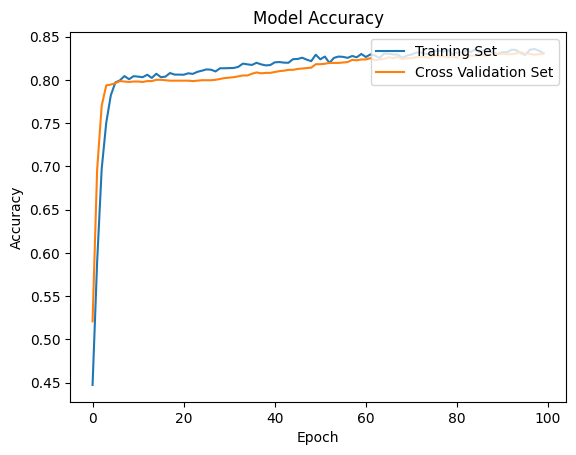

In [24]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Cross Validation Set'], loc = 'upper right')
plt.show()

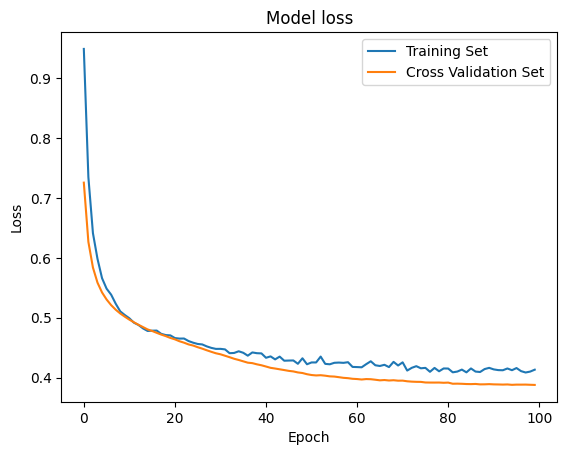

In [25]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Cross Validation Set'], loc = 'upper right')
plt.show()

**Fitting Model into Test Dataset and Making Predictions**

In [26]:
## predicting test dataset results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [27]:
##Confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[1582,    8],
       [ 330,   80]])

In [28]:
##calculating the accuracy on test dataset
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.831

**DONE!!**